<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment: Exploring and Preparing Data


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing\_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


***


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [1]:
# andas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [2]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# If you were unable to complete the previous lab correctly you can uncomment and load this csv

# df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')

df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


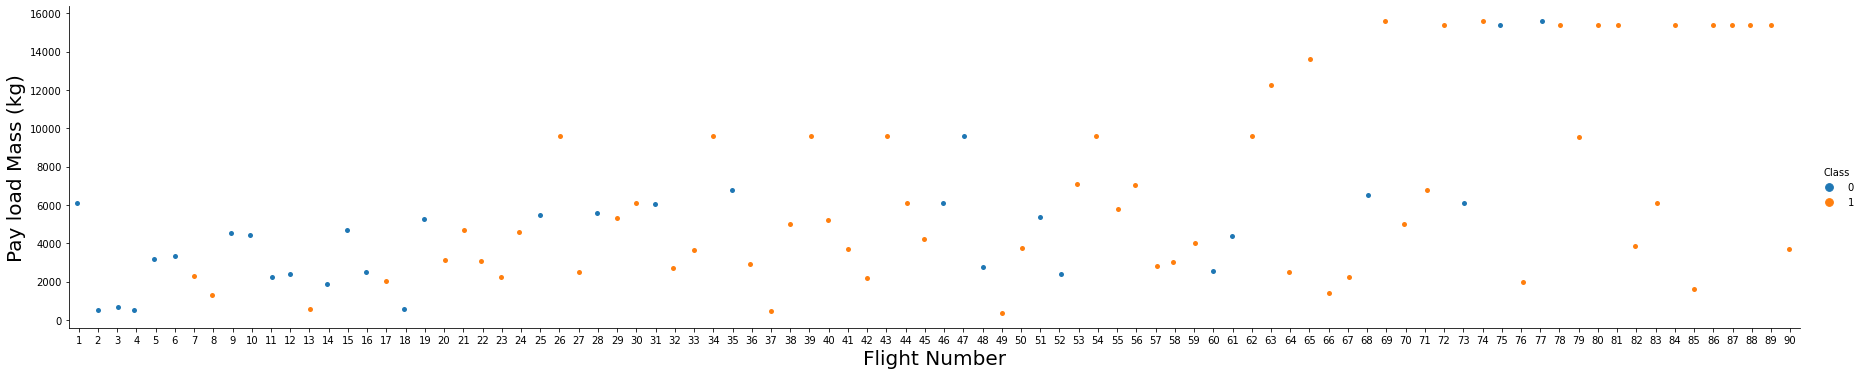

In [3]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


Next, let's drill down to each site visualize its detailed launch records.


### TASK 1: Visualize the relationship between Flight Number and Launch Site


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


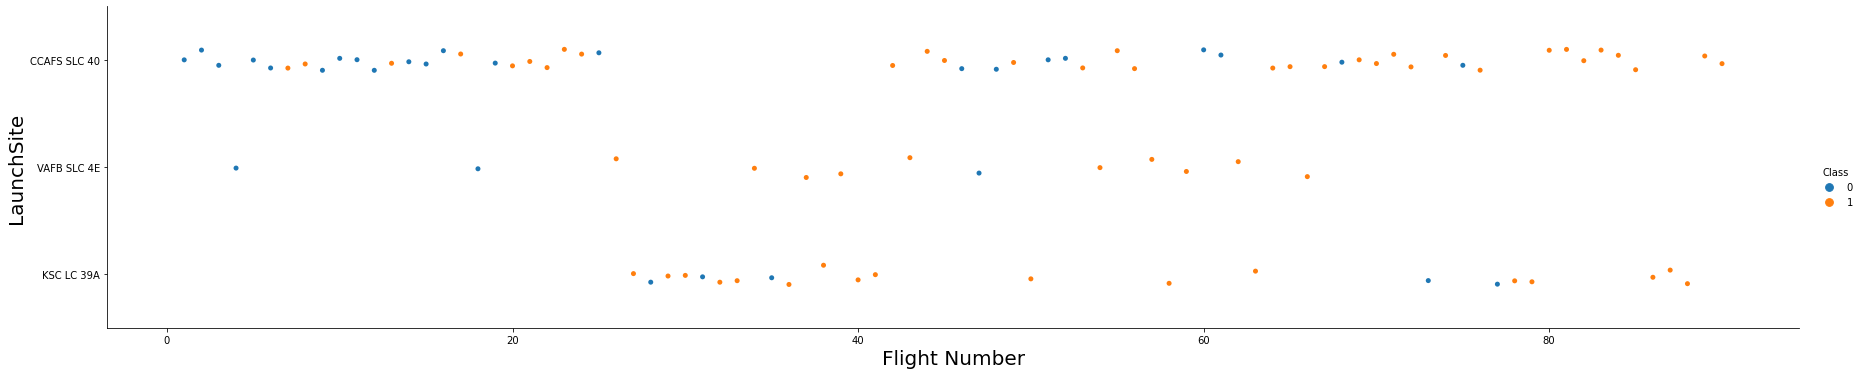

In [4]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("LaunchSite",fontsize=20)
plt.show()

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


### TASK 2: Visualize the relationship between Payload and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


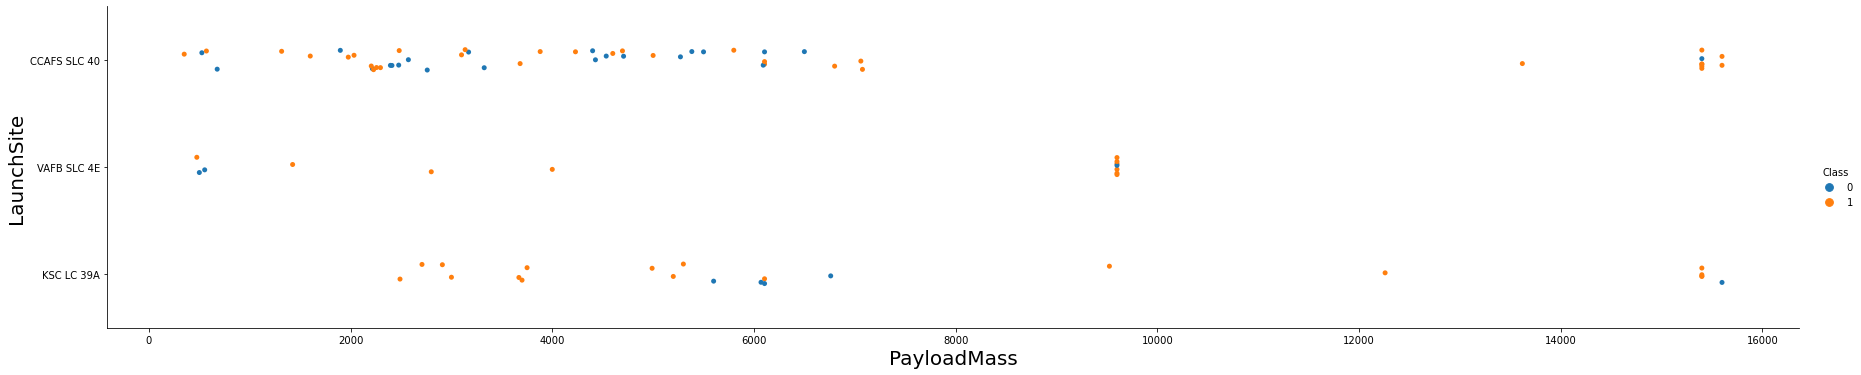

In [5]:
sns.catplot(x="PayloadMass", y="LaunchSite", hue="Class", data=df, aspect = 5)
plt.xlabel("PayloadMass",fontsize=20)
plt.ylabel("LaunchSite",fontsize=20)
plt.show()

Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


### TASK  3: Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


In [8]:
for index, value in enumerate(grouped_test1.values.tolist()): 
        label1 = format(round(value,2), ',')+" Ppl"
        print(label1)

1.0 Ppl
1.0 Ppl
0.52 Ppl
1.0 Ppl
0.62 Ppl
0.71 Ppl
0.67 Ppl
0.67 Ppl
0.0 Ppl
1.0 Ppl
0.86 Ppl


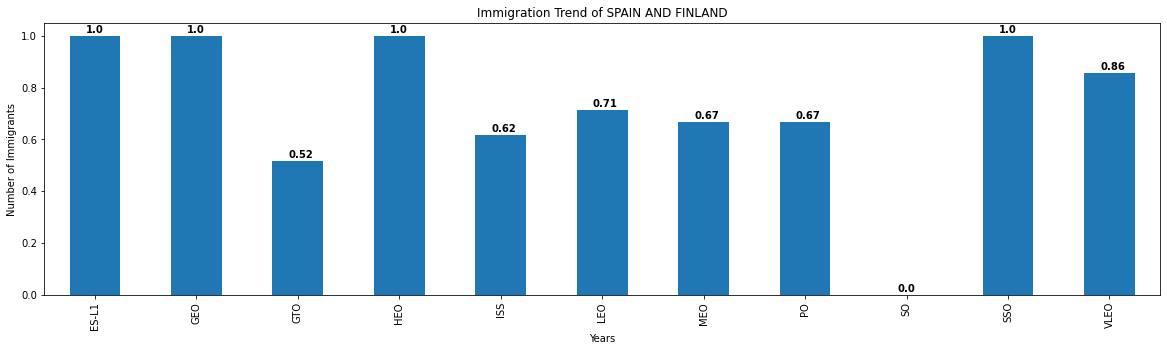

In [7]:
# HINT use groupby method on Orbit column and get the mean of Class column
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas # import FigureCanvas 
from matplotlib.figure import Figure #import Figure artist 
import matplotlib.pyplot as plt
grouped_test1=df.groupby(['Orbit'])['Class'].mean()

fig = plt.figure() # create figure
ax1 = fig.add_subplot(1, 1, 1)


#probamos CON DF
grouped_test1.plot(kind='bar',figsize=(20, 5),ax=ax1)#alpha enfasis de las areas

ax1.set_title('Immigration Trend of SPAIN AND FINLAND')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')
for index, value in enumerate(grouped_test1.values.tolist()): 
        label1 = format(round(value,2), ',')

        #plt.annotate(label1, xy=(value, index-0.075),va='top',color='black',weight='bold') #poner una annotacion en la posicion que yo quiera
        ax1.annotate(label1, xy=(index-0.093,value+0.024),va='center', color='black',weight='bold')
        

Analyze the ploted bar chart try to find which orbits have high sucess rate.


### TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


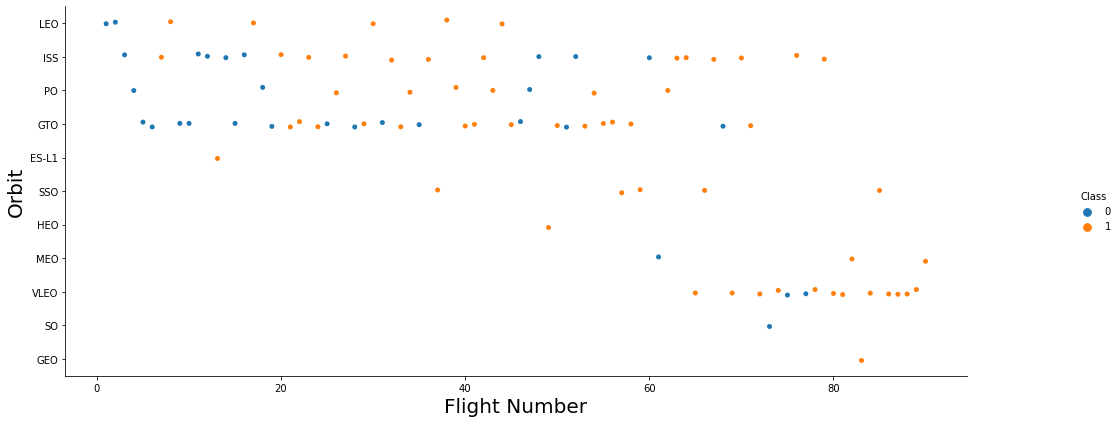

In [129]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
g=sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, aspect = 5)
g.fig.set_size_inches(15,7)
g.fig.subplots_adjust(top=0.81, right=0.86)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()


You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


### TASK  5: Visualize the relationship between Payload and Orbit type


Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


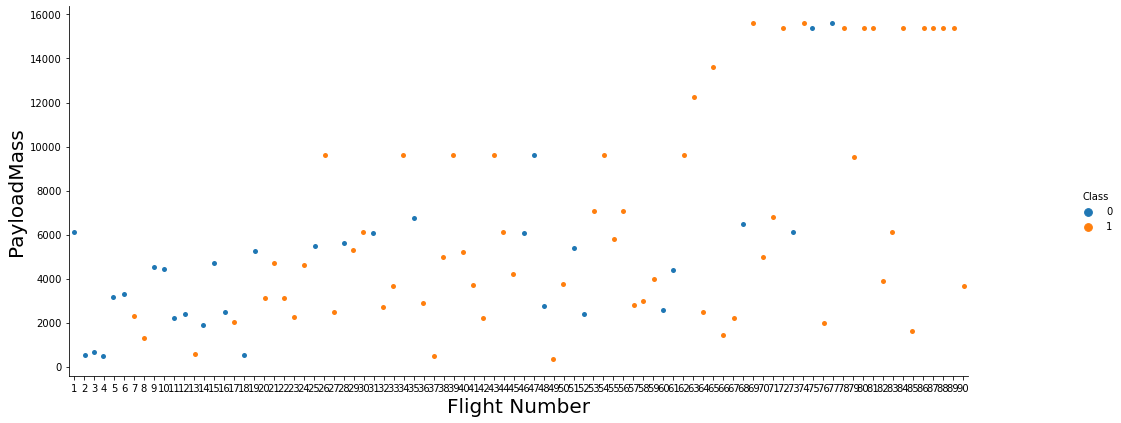

In [128]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
g=sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
g.fig.set_size_inches(15,7)
g.fig.subplots_adjust(top=0.81, right=0.86)

plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("PayloadMass",fontsize=20)
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.


### TASK  6: Visualize the launch success yearly trend


In [11]:
df.head(1)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


In [24]:
# A function to Extract years from the date 
year=[]
def Extract_year(date):
    year=date.split("-")[0]
    return year
df["año"]=df["Date"].map(Extract_year)

In [25]:
grouped_test1=df.groupby(['año'])['Class'].mean()
grouped_test1=pd.DataFrame({'año':grouped_test1.index, 'succes_rate':grouped_test1.values})


In [45]:
grouped_test1

,año,succes_rate
0,2010,0.000000
1,2012,0.000000
2,2013,0.000000
3,2014,0.333333
4,2015,0.333333
5,2016,0.625000
6,2017,0.833333
7,2018,0.611111
8,2019,0.900000
9,2020,0.842105


In [51]:
print([str(x[0])+":"+str(round(x[1],2)) for x in grouped_test1.values.tolist()])

['2010:0.0', '2012:0.0', '2013:0.0', '2014:0.33', '2015:0.33', '2016:0.62', '2017:0.83', '2018:0.61', '2019:0.9', '2020:0.84']


In [55]:
grouped_test1['año']=grouped_test1['año'].astype(int)
grouped_test1.dtypes

año              int32
succes_rate    float64
dtype: object

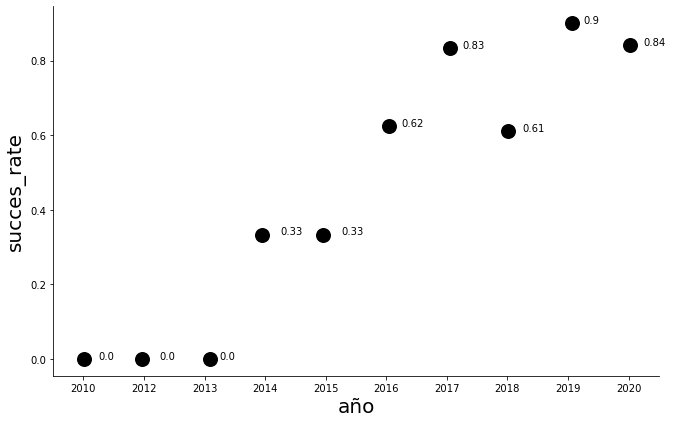

In [72]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate

g=sns.catplot(y="succes_rate", x="año",s = 15,color="black", data=grouped_test1, aspect = 5)
g.fig.set_size_inches(10,7)
g.fig.subplots_adjust(top=0.81, right=0.86)

# extract the matplotlib axes_subplot objects from the FacetGrid
labels = [str(x[0])+":"+str(round(x[1],2)) for x in grouped_test1.values.tolist()]
x_ax = grouped_test1['año']
y_ax = grouped_test1['succes_rate']
ax = g.facet_axis(0, 0)
for i, label in enumerate (y_ax):
    plt.text(i+0.25, label, str(round(label,2)))

# Loop through the data points 


plt.xlabel("año",fontsize=20)
plt.ylabel("succes_rate",fontsize=20)
plt.show()


you can observe that the sucess rate since 2013 kept increasing till 2020


## Features Engineering


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [14]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [92]:
print(len(['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']))
len(features_one_hot.columns)

12


80

In [101]:
print(df['LandingPad'].value_counts())
len(df['LandingPad'].value_counts().keys())

5e9e3032383ecb6bb234e7ca    35
5e9e3032383ecb267a34e7c7    13
5e9e3033383ecbb9e534e7cc    12
5e9e3032383ecb761634e7cb     2
5e9e3032383ecb554034e7c9     2
Name: LandingPad, dtype: int64


5

In [91]:
for i,pos in enumerate(['Orbit', 'LaunchSite', 'LandingPad', 'Serial']):
    print(pos,":",len(df[pos].value_counts().keys()))
#esto da 72 

Orbit : 11
LaunchSite : 3
LandingPad : 5
Serial : 53


In [125]:
#las iniciales dan 8 variables numericas.   8+72 dumyficadas= 80
len(df.select_dtypes(include='number').columns.tolist())

8

### TASK  7: Create dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [15]:
# HINT: Use get_dummies() function on the categorical columns
 = pd.get_dummies(features)
# merge data frame "df" and "dummy_variable_1" 

dfmodel = pd.concat([df, features_one_hot], axis=1)
dfmodel

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,...,0,0,0,0,0,0,0,0,0,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,...,0,0,0,0,0,0,0,0,0,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,...,0,0,0,0,0,0,0,0,0,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,...,0,0,0,0,0,0,0,0,0,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,2020-09-03,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,2,True,True,...,0,0,0,0,0,0,0,0,1,0
86,87,2020-10-06,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,3,True,True,...,0,0,0,0,0,0,1,0,0,0
87,88,2020-10-18,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,6,True,True,...,0,0,0,1,0,0,0,0,0,0
88,89,2020-10-24,Falcon 9,15400.000000,VLEO,CCAFS SLC 40,True ASDS,3,True,True,...,0,0,0,0,0,0,0,0,1,0


In [113]:

initial_col=df.select_dtypes(include='number').columns.tolist()
new_cols=dfmodel[dfmodel.columns.tolist()[26:]].columns.tolist()
final_cols=[*initial_col, *new_cols] 

In [115]:
len(final_cols)

80

In [118]:

for i,pos in enumerate(final_cols):
    dfmodel[pos]=dfmodel[pos].astype(int)
        
df1=dfmodel[final_cols]
df2 = df1.loc[:,~df1.columns.duplicated()].copy()
df2

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Longitude,Latitude,Class,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104,1,1,0,-80,28,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525,1,1,0,-80,28,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677,1,1,0,-80,28,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500,1,1,0,-120,34,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170,1,1,0,-80,28,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,15400,2,5,2,-80,28,1,0,0,...,0,0,0,0,0,0,0,0,1,0
86,87,15400,3,5,2,-80,28,1,0,0,...,0,0,0,0,0,0,1,0,0,0
87,88,15400,6,5,5,-80,28,1,0,0,...,0,0,0,1,0,0,0,0,0,0
88,89,15400,3,5,2,-80,28,1,0,0,...,0,0,0,0,0,0,0,0,1,0


### TASK  8: Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [121]:
df2.dtypes

FlightNumber    int32
PayloadMass     int32
Flights         int32
Block           int32
ReusedCount     int32
                ...  
Serial_B1056    int32
Serial_B1058    int32
Serial_B1059    int32
Serial_B1060    int32
Serial_B1062    int32
Length: 80, dtype: object

In [122]:
# HINT: use astype function
df2.head(2)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Longitude,Latitude,Class,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104,1,1,0,-80,28,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525,1,1,0,-80,28,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


In [123]:
df2.to_csv('dataset_part_3.csv', index=False)

<code>features_one_hot.to_csv('dataset_part\_3.csv', index=False)</code>


## Authors


<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


<a href="https://www.linkedin.com/in/nayefaboutayoun/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01">Nayef Abou Tayoun</a> is a Data Scientist at IBM and pursuing a Master of Management in Artificial intelligence degree at Queen's University.


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By    | Change Description      |
| ----------------- | ------- | ------------- | ----------------------- |
| 2021-10-12        | 1.1     | Lakshmi Holla | Modified markdown       |
| 2020-09-20        | 1.0     | Joseph        | Modified Multiple Areas |
| 2020-11-10        | 1.1     | Nayef         | updating the input data |


Copyright © 2020 IBM Corporation. All rights reserved.
